# Import Module

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import get_x_y

# Free Params

In [2]:
num_obs = 48
num_weekdays = 6
num_weeks = 3
num_samples = num_obs*(num_weekdays+1)*num_weeks

energy_1 = 1e6
energy_0 = 0.2*1e6

getup_t = 14
breakfast_t = 18
dinner_t = 34
sleep_t = 46

# Generate Data

In [3]:
simulate_x = []

# Weekday
for t in range(0, num_obs, 1):
    if getup_t <= t < breakfast_t:
        simulate_x.append(energy_1)
    elif breakfast_t <= t < dinner_t:
        simulate_x.append(energy_0)
    elif dinner_t <= t < sleep_t:
        simulate_x.append(energy_1)
    else:
        simulate_x.append(0.2 * energy_1)
simulate_x = simulate_x*num_weekdays

# Sunday
for t in range(0, num_obs, 1):
    if getup_t <= t < breakfast_t:
        simulate_x.append(energy_1)
    elif breakfast_t <= t < dinner_t:
        simulate_x.append(0.6 * energy_1)
    elif dinner_t <= t < sleep_t:
        simulate_x.append(energy_1)
    else:
        simulate_x.append(0.2 * energy_1)
simulate_x = simulate_x*num_weeks

noise = np.random.normal(energy_1/25, energy_1/10, (num_samples, ))

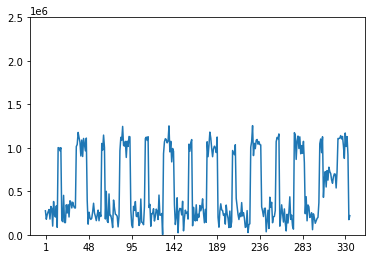

In [4]:
simulate_x = simulate_x + noise
simulate_x = [0.1*1e6 if val < 0 else val for val in simulate_x]

plt.plot(simulate_x[:48*7])
plt.xticks(range(1, 48*7, 47))
plt.ylim([0, 2.5e6])
plt.show()

In [5]:
simulate_y = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]*num_weekdays
simulate_y.extend([1] * 16)
simulate_y = simulate_y * num_weeks

# Add Test Data

In [6]:
getup_t = 12
breakfast_t = 16
dinner_t = 32
sleep_t = 44

In [7]:
test_x = []

for t in range(0, num_obs, 1):
    if getup_t <= t < breakfast_t:
        test_x.append(energy_1)
    elif breakfast_t <= t < dinner_t:
        test_x.append(energy_0)
    elif dinner_t <= t < sleep_t:
        test_x.append(energy_1)
    else:
        test_x.append(0.2 * energy_1)
test_x = test_x*num_weekdays

for t in range(0, num_obs, 1):
    if getup_t <= t < breakfast_t:
        test_x.append(energy_1)
    elif breakfast_t <= t < dinner_t:
        test_x.append(0.6 * energy_1)
    elif dinner_t <= t < sleep_t:
        test_x.append(energy_1)
    else:
        test_x.append(0.2 * energy_1)

test_y = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]*num_weekdays
simulate_y.extend([1] * 16)

In [8]:
simulate_x.extend(test_x)
simulate_y.extend(test_y)
simulate_y = pd.DataFrame(simulate_y)

# Feature Extraction

In [9]:
means, maxs, mins, stds, ranges = get_x_y.create_features(energy=simulate_x)
times = [t for t in range(0, 24, 1)]*(num_weekdays+1)*(num_weeks+1)
seasons = [1 for i in range(int(num_samples/2 + 24*7))]

is_sundays = [0 for i in range(0, 24, 1)]*num_weekdays
is_sundays.extend([1 for i in range(0, 24, 1)])
is_sundays = is_sundays * (num_weeks+1)

features_sum = pd.DataFrame({
    "Mean": means, "Max": maxs,
    "Min": mins, "Std": stds, "Range": ranges,
    "Time": times, "Season": seasons, "Sunday": is_sundays
    })

In [10]:
features_sum = features_sum[(features_sum.Time > 5) & (features_sum.Time < 22)]
am_pm = get_x_y.get_am_pm(times=features_sum["Time"])
features_sum = features_sum.drop(columns="Time")
features_sum = features_sum.reset_index(drop=True)
features_sum = pd.concat([features_sum, am_pm], axis=1)
features_sum = features_sum.rename({0: "Am", 1: "Lunch", 2: "Pm"}, axis=1)

features_sum = features_sum.reindex([
    'Mean', 'Max', 'Min', 'Std',
    'Range', 'Season', 'Sunday',
    'Am', 'Lunch', 'Pm'
    ], axis=1)

In [11]:
features_sum.to_csv("X_simulate.csv", index=False)
simulate_y.to_csv("Y_simulate.csv", index=False)